In [12]:
#Wranlging
import pandas as pd
import numpy as np
import seaborn as sns

#Classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [13]:
data = pd.read_csv('cwurData.csv')
data= data.replace('0',np.nan) #reaplcing all the nan with zeros
data = data.dropna(axis="columns", how="any")
print(data.shape)
data

(2200, 13)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,651,44.02,2015


In [14]:
data2015 = data[data.year  ==2015]

In [15]:
data2015.drop(['country','year'],axis=1, inplace = True)

/home/mrityunjay/.conda/envs/project/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
data2015

,world_rank,institution,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
1200,1,Harvard University,1,1,1,1,1,1,1,3,100.00
1201,2,Stanford University,2,9,2,4,5,3,3,10,98.66
1202,3,Massachusetts Institute of Technology,3,3,11,2,15,2,2,1,97.54
1203,4,University of Cambridge,1,2,10,5,11,6,12,48,96.81
1204,5,University of Oxford,2,7,13,10,7,12,7,15,96.46
...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,7,367,567,218,926,845,812,816,44.03
2196,997,Alexandria University,4,236,566,218,997,908,645,871,44.03
2197,998,Federal University of Ceará,18,367,549,218,830,823,812,824,44.03
2198,999,University of A Coruña,40,367,567,218,886,974,812,651,44.02


In [17]:
factor = list(data2015.columns.values)[2:9]
print (factor)

['national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations']


/home/mrityunjay/.conda/envs/project/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



2

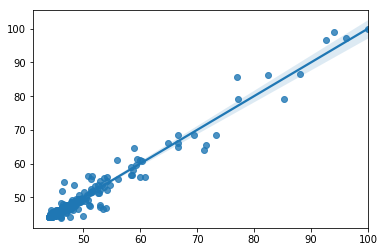

In [18]:
#applying models now
score = data.score
train = data[factor]
lab_enc = preprocessing.LabelEncoder()
score_encoded = lab_enc.fit_transform(score)

x_train, y_train, x_test, y_test = train_test_split(train,score_encoded,train_size = 0.8, random_state = 2)

#random forest claassifier
forest = RandomForestClassifier()
forest.fit(x_train,x_test) #this is where the model trains
y_pred = forest.predict(y_train)
y1 = lab_enc.inverse_transform(y_test)
y2 = lab_enc.inverse_transform(y_pred)

sns.regplot(y1,y2)
2#np.corrcoef(y1,y2)

In [19]:
#the shaded region represnts the predicted value
#calculating percentage accuarcy
fit = 0
for i in range(len(y1)):
    if (y1[i] - 0.5) <= y2[i] <= (y1[i] + 0.5):
        fit = fit + 1
        
print(fit/len(y1))

0.7136363636363636
